In [1]:
# import kaggle

# kaggle.api.authenticate()
# kaggle.api.dataset_download_files('elvis23/mental-health-conversational-data', path='.', unzip=True)
# # kaggle.api.dataset_download_files('xmaulana/psychikadataset-7b', path='.', unzip=True)

In [2]:
import json
import pandas as pd

with open('intents.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data['intents'])

In [3]:
dic = {"tag":[], "patterns":[], "responses":[]}
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]
    rspns = df[df.index == i]['responses'].values[0]
    tag = df[df.index == i]['tag'].values[0]
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)
        
df = pd.DataFrame.from_dict(dic)
df

,tag,patterns,responses
0,greeting,Hai,[Halo. Ceritakan bagaimana perasaanmu hari ini...
1,greeting,Hei,[Halo. Ceritakan bagaimana perasaanmu hari ini...
2,greeting,Ada orang di sana?,[Halo. Ceritakan bagaimana perasaanmu hari ini...
3,greeting,Hai,[Halo. Ceritakan bagaimana perasaanmu hari ini...
4,greeting,Halo,[Halo. Ceritakan bagaimana perasaanmu hari ini...
...,...,...,...
226,fact-29,Bagaimana saya tahu jika saya sedang tidak sehat?,"[Jika keyakinan, pikiran, perasaan, atau peril..."
227,fact-30,Bagaimana saya bisa menjaga koneksi sosial? Ba...,"[Banyak orang merasa sendirian sekarang, tetap..."
228,fact-31,Apa perbedaan antara kecemasan dan stres?,[Stres dan kecemasan sering digunakan secara b...
229,fact-32,Apa perbedaan antara kesedihan dan depresi?,[Kesedihan adalah reaksi normal terhadap kehil...


In [4]:
df_responses = df.explode('responses')
all_patterns = ' '.join(df['patterns'])

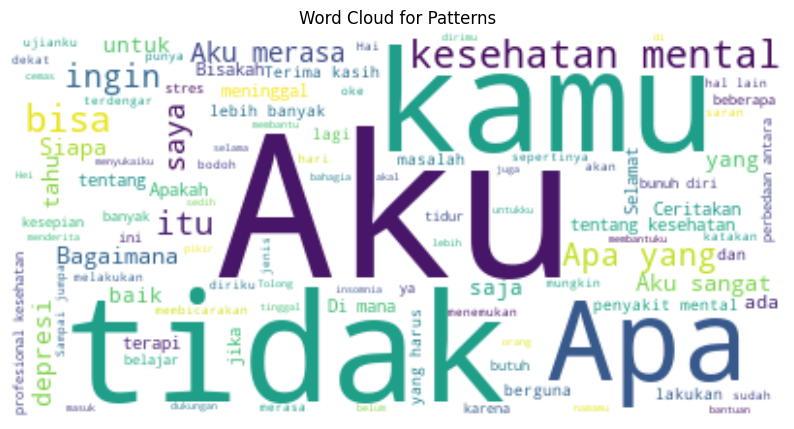

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(all_patterns)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Patterns')
plt.show()

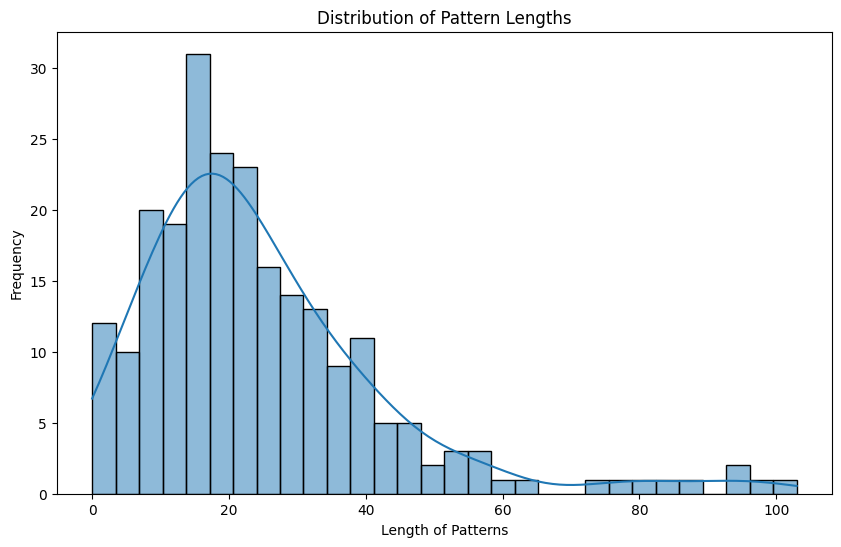

In [6]:
df['pattern_length'] = df['patterns'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['pattern_length'], bins=30, kde=True)
plt.title('Distribution of Pattern Lengths')
plt.xlabel('Length of Patterns')
plt.ylabel('Frequency')
plt.show()

In [7]:
import re

def preprocess_text(s):
    s = re.sub('[^a-zA-Z\']', ' ', s) 
    s = s.lower()
    s = s.split()
    s = " ".join(s)
    return s

df['patterns'] = df['patterns'].apply(preprocess_text)
df['tag'] = df['tag'].apply(preprocess_text)
df

,tag,patterns,responses,pattern_length
0,greeting,hai,[Halo. Ceritakan bagaimana perasaanmu hari ini...,3
1,greeting,hei,[Halo. Ceritakan bagaimana perasaanmu hari ini...,3
2,greeting,ada orang di sana,[Halo. Ceritakan bagaimana perasaanmu hari ini...,18
3,greeting,hai,[Halo. Ceritakan bagaimana perasaanmu hari ini...,3
4,greeting,halo,[Halo. Ceritakan bagaimana perasaanmu hari ini...,4
...,...,...,...,...
226,fact,bagaimana saya tahu jika saya sedang tidak sehat,"[Jika keyakinan, pikiran, perasaan, atau peril...",49
227,fact,bagaimana saya bisa menjaga koneksi sosial bag...,"[Banyak orang merasa sendirian sekarang, tetap...",80
228,fact,apa perbedaan antara kecemasan dan stres,[Stres dan kecemasan sering digunakan secara b...,41
229,fact,apa perbedaan antara kesedihan dan depresi,[Kesedihan adalah reaksi normal terhadap kehil...,43


In [8]:
import plotly.graph_objects as go

intent_counts = df['tag'].value_counts()
fig = go.Figure(data=[go.Bar(x=intent_counts.index, y=intent_counts.values)])
fig.update_layout(title='Distribution of Intents', xaxis_title='Intents', yaxis_title='Count')
fig.show()

In [9]:
df['pattern_count'] = df['patterns'].apply(lambda x: len(x))
df['response_count'] = df['responses'].apply(lambda x: len(x))
avg_pattern_count = df.groupby('tag')['pattern_count'].mean()
avg_response_count = df.groupby('tag')['response_count'].mean()

fig = go.Figure()
fig.add_trace(go.Bar(x=avg_pattern_count.index, y=avg_pattern_count.values, name='Average Pattern Count'))
fig.add_trace(go.Bar(x=avg_response_count.index, y=avg_response_count.values, name='Average Response Count'))
fig.update_layout(title='Pattern and Response Analysis', xaxis_title='Intents', yaxis_title='Average Count')
fig.show()

In [10]:
df['tag'].unique()

array(['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye',
       'thanks', 'no response', 'neutral response', 'about', 'skill',
       'creation', 'name', 'help', 'sad', 'stressed', 'worthless',
       'depressed', 'happy', 'casual', 'anxious', 'not talking', 'sleep',
       'scared', 'death', 'understand', 'done', 'suicide', 'hate you',
       'hate me', 'default', 'jokes', 'repeat', 'wrong', 'stupid',
       'location', 'something else', 'friends', 'ask', 'problem',
       'no approach', 'learn more', 'user agree', 'meditation',
       'user meditation', 'pandora useful', 'user advice',
       'learn mental health', 'mental health fact', 'fact'], dtype=object)

In [11]:
len(df['tag'].unique())

50

# PRE PROCESSING INDO

In [12]:
import numpy as np
import pandas as pd
import nltk
import random
import json
import re
import string
import itertools

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to C:\Users\Athaya
[nltk_data]     Rohadatul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
import nltk
nltk.download('punkt')

nltk.download('stopwords')


[nltk_data] Downloading package punkt to C:\Users\Athaya
[nltk_data]     Rohadatul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Athaya
[nltk_data]     Rohadatul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
import json
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# 1. Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

# 2. Create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# 3. Load your intents.json
with open("intents.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# 4. Flatten data
rows = []
for intent in data["intents"]:
    tag = intent["tag"]
    patterns = intent["patterns"]
    responses = intent["responses"]

    for pattern in patterns:
        for response in responses:
            rows.append({
                "intent": tag,
                "pattern": pattern,
                "response": response
            })

df = pd.DataFrame(rows)

# 5. Text preprocessing function
def preprocess_text(text):
    text = text.lower()                            # lowercase
    text = re.sub(r"[^\w\s]", " ", text)           # remove punctuation
    words = text.split()
    words = [w for w in words if w not in stop_words]  # remove stopwords
    text = ' '.join(words)
    stemmed = stemmer.stem(text)                   # stemming
    return stemmed.strip()

# 6. Apply preprocessing
df["pattern_clean"] = df["pattern"].apply(preprocess_text)
df["response_clean"] = df["response"].apply(preprocess_text)

# 7. Show result
print(df[["intent", "pattern", "pattern_clean", "response_clean"]].head())


[nltk_data] Downloading package stopwords to C:\Users\Athaya
[nltk_data]     Rohadatul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     intent pattern pattern_clean           response_clean
0  greeting     Hai           hai          halo cerita asa
1  greeting     Hai           hai                 hai bawa
2  greeting     Hai           hai                  hai asa
3  greeting     Hai           hai         senang lihat asa
4  greeting     Hai           hai  halo senang lihat dunia


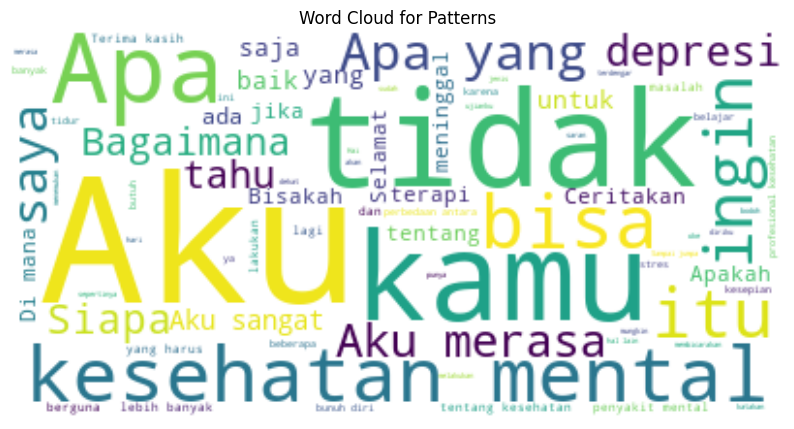

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(all_patterns)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Patterns')
plt.show()

In [16]:
X = df['pattern_clean']
y = df['intent']

# Build Model

# cendol


In [17]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

MODEL_ID = "indonlp/cendol-mt5-small-inst"
tokenizer = AutoTokenizer.from_pretrained(MODEL_ID)
model = AutoModelForSeq2SeqLM.from_pretrained(MODEL_ID, from_tf=False)

c:\Users\Athaya Rohadatul\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [18]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

MT5ForConditionalGeneration(
  (shared): Embedding(250112, 512)
  (encoder): MT5Stack(
    (embed_tokens): Embedding(250112, 512)
    (block): ModuleList(
      (0): MT5Block(
        (layer): ModuleList(
          (0): MT5LayerSelfAttention(
            (SelfAttention): MT5Attention(
              (q): Linear(in_features=512, out_features=384, bias=False)
              (k): Linear(in_features=512, out_features=384, bias=False)
              (v): Linear(in_features=512, out_features=384, bias=False)
              (o): Linear(in_features=384, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 6)
            )
            (layer_norm): MT5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): MT5LayerFF(
            (DenseReluDense): MT5DenseGatedActDense(
              (wi_0): Linear(in_features=512, out_features=1024, bias=False)
              (wi_1): Linear(in_features=512, out_features=1024, bias=False)
          

In [19]:
df['input_text'] = "Tentukan intent dari kalimat berikut: " + df['pattern_clean']
df['target_text'] = df['intent']


In [21]:
from torch.utils.data import Dataset

MAX_INPUT_LENGTH = 128
MAX_TARGET_LENGTH = 16

class IntentDataset(Dataset):
    def __init__(self, input_texts, target_texts, tokenizer):
        self.input_texts = input_texts
        self.target_texts = target_texts
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.input_texts)

    def __getitem__(self, idx):
        input_enc = self.tokenizer(self.input_texts[idx],
                                   padding="max_length",
                                   truncation=True,
                                   max_length=MAX_INPUT_LENGTH,
                                   return_tensors="pt")
        target_enc = self.tokenizer(self.target_texts[idx],
                                    padding="max_length",
                                    truncation=True,
                                    max_length=MAX_TARGET_LENGTH,
                                    return_tensors="pt")

        input_ids = input_enc.input_ids.squeeze()
        attention_mask = input_enc.attention_mask.squeeze()
        labels = target_enc.input_ids.squeeze()
        labels[labels == tokenizer.pad_token_id] = -100

        return {
            "input_ids": input_ids,
            "attention_mask": attention_mask,
            "labels": labels
        }


In [ ]:
# from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
# from torch.utils.data import Dataset

# MODEL_ID = "indonlp/cendol-mt5-small-inst"
# tokenizer = AutoTokenizer.from_pretrained(MODEL_ID)
# model = AutoModelForSeq2SeqLM.from_pretrained(MODEL_ID)

# MAX_INPUT_LENGTH = 128
# MAX_TARGET_LENGTH = 16

# class IntentDataset(Dataset):
#     def __init__(self, input_texts, target_texts, tokenizer):
#         self.input_texts = input_texts
#         self.target_texts = target_texts
#         self.tokenizer = tokenizer

#     def __len__(self):
#         return len(self.input_texts)

#     def __getitem__(self, idx):
#         input_enc = tokenizer(self.input_texts[idx], 
#                               padding="max_length", 
#                               truncation=True,
#                               max_length=MAX_INPUT_LENGTH,
#                               return_tensors="pt")
#         target_enc = tokenizer(self.target_texts[idx], 
#                                padding="max_length", 
#                                truncation=True,
#                                max_length=MAX_TARGET_LENGTH,
#                                return_tensors="pt")

#         input_ids = input_enc.input_ids.squeeze()
#         attention_mask = input_enc.attention_mask.squeeze()
#         labels = target_enc.input_ids.squeeze()
#         labels[labels == tokenizer.pad_token_id] = -100  # ignore padding in loss

#         return {
#             "input_ids": input_ids,
#             "attention_mask": attention_mask,
#             "labels": labels
#         }


In [22]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

# Split data
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df["input_text"].tolist(),
    df["target_text"].tolist(),
    test_size=0.1,
    random_state=42
)

# Buat Dataset
train_dataset = IntentDataset(train_texts, train_labels, tokenizer)
val_dataset = IntentDataset(val_texts, val_labels, tokenizer)

# Buat DataLoader
BATCH_SIZE = 16
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE)


In [ ]:
# from sklearn.model_selection import train_test_split

# train_texts, val_texts, train_labels, val_labels = train_test_split(
#     df["input_text"].tolist(), df["target_text"].tolist(), test_size=0.1, random_state=42)

# train_dataset = IntentDataset(train_texts, train_labels, tokenizer)
# val_dataset = IntentDataset(val_texts, val_labels, tokenizer)


In [25]:
from transformers import AutoTokenizer
from sklearn.metrics import accuracy_score
import torch
from torch.optim import AdamW

optimizer = AdamW(model.parameters(), lr=2e-5)



tokenizer = AutoTokenizer.from_pretrained(MODEL_ID)

epochs = 30
patience = 5
best_val_loss = float('inf')
patience_counter = 0

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_dataloader:
        b_input_ids = batch["input_ids"].to(device)
        b_input_mask = batch["attention_mask"].to(device)
        b_labels = batch["labels"].to(device)

        model.zero_grad()
        outputs = model(
            input_ids=b_input_ids,
            attention_mask=b_input_mask,
            labels=b_labels
        )
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_train_loss = total_loss / len(train_dataloader)

    # VALIDATION
    model.eval()
    val_loss = 0
    generated_texts = []
    reference_texts = []

    with torch.no_grad():
        for batch in val_dataloader:
            b_input_ids = batch["input_ids"].to(device)
            b_input_mask = batch["attention_mask"].to(device)
            b_labels = batch["labels"].to(device)

            outputs = model(
                input_ids=b_input_ids,
                attention_mask=b_input_mask,
                labels=b_labels
            )
            val_loss += outputs.loss.item()

            # GENERATE OUTPUTS
            generated_ids = model.generate(
                input_ids=b_input_ids,
                attention_mask=b_input_mask,
                max_length=128
            )

            preds = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)
            labels_for_decoding = b_labels.clone()
            labels_for_decoding[labels_for_decoding == -100] = tokenizer.pad_token_id
            labels = tokenizer.batch_decode(labels_for_decoding, skip_special_tokens=True)

            generated_texts.extend(preds)
            reference_texts.extend(labels)

    avg_val_loss = val_loss / len(val_dataloader)
    print(f"Epoch {epoch+1}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    # EARLY STOPPING
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        torch.save(model.state_dict(), "best_model.pt")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break


Epoch 1, Train Loss: 3.2653, Val Loss: 3.4410
Epoch 2, Train Loss: 2.9171, Val Loss: 3.0628
Epoch 3, Train Loss: 2.5464, Val Loss: 2.6593
Epoch 4, Train Loss: 2.2722, Val Loss: 2.3243
Epoch 5, Train Loss: 2.0454, Val Loss: 2.0343
Epoch 6, Train Loss: 1.8775, Val Loss: 1.7950
Epoch 7, Train Loss: 1.7111, Val Loss: 1.6989
Epoch 8, Train Loss: 1.5944, Val Loss: 1.5283
Epoch 9, Train Loss: 1.4897, Val Loss: 1.3978
Epoch 10, Train Loss: 1.3760, Val Loss: 1.3532
Epoch 11, Train Loss: 1.3320, Val Loss: 1.2730
Epoch 12, Train Loss: 1.2253, Val Loss: 1.1888
Epoch 13, Train Loss: 1.2099, Val Loss: 1.1542
Epoch 14, Train Loss: 1.1303, Val Loss: 1.1026
Epoch 15, Train Loss: 1.0991, Val Loss: 1.0808
Epoch 16, Train Loss: 1.0652, Val Loss: 1.0554
Epoch 17, Train Loss: 1.0340, Val Loss: 0.9996
Epoch 18, Train Loss: 0.9583, Val Loss: 0.9749
Epoch 19, Train Loss: 0.9267, Val Loss: 0.9658
Epoch 20, Train Loss: 0.8906, Val Loss: 0.9357
Epoch 21, Train Loss: 0.8650, Val Loss: 0.9137
Epoch 22, Train Loss: 

In [32]:
import numpy as np

def preprocess_text(text):
    # contoh sederhana
    return text.lower().strip()

def encode_texts(texts):
    enc = tokenizer(
        texts,
        padding="max_length",
        truncation=True,
        max_length=MAX_INPUT_LENGTH,
        return_tensors="pt"
    )
    return enc.input_ids, enc.attention_mask

def predict_intent(text):
    model.eval()
    cleaned = preprocess_text(text)
    input_text = "Tentukan intent dari kalimat berikut: " + cleaned
    input_enc = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True, max_length=MAX_INPUT_LENGTH).to(device)

    with torch.no_grad():
        generated_ids = model.generate(
            input_ids=input_enc.input_ids,
            attention_mask=input_enc.attention_mask,
            max_length=8
        )

    preds = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)
    intent = preds[0].strip()

    # print(f"[DEBUG] Predicted intent: '{intent}'")

    responses = df[df['intent'] == intent]['response'].values
    if len(responses) > 0:
        response = np.random.choice(responses)
    else:
        response = "Maaf, saya tidak mengerti maksud Anda."

    return intent, response

print("TanyaRasa Chatbot (type 'quit' to exit)")
while True:
    user_input = input("You: ")
    if user_input.lower() == "quit":
        print("Chatbot: Sampai jumpa!")
        break
    intent, response = predict_intent(user_input)
    print(f"User ({intent}): {user_input}")
    print(f"Chatbot ({intent}): {response}")


TanyaRasa Chatbot (type 'quit' to exit)
User (greeting): hai
Chatbot (greeting): Hai. Apa yang membawamu ke sini hari ini?
User (happy): aku lagi senang
Chatbot (happy): Senang mendengarnya. Aku senang kamu merasa seperti ini.
User (fact-2): apa penyebab penyakit mental?
Chatbot (fact-2): Menjaga kesehatan mental sangat penting untuk menstabilkan perilaku, emosi, dan pikiran yang konstruktif. Fokus pada perawatan kesehatan mental dapat meningkatkan produktivitas, meningkatkan citra diri, dan memperbaiki hubungan.
Chatbot: Sampai jumpa!


# Model Evaluation

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Asumsi all_preds dan all_labels sudah berupa list string label (intent)

acc = accuracy_score(all_labels, all_preds)
print(f"Validation Accuracy: {acc:.4f}")

print("Classification Report:")
print(classification_report(all_labels, all_preds, zero_division=0))

print("Confusion Matrix:")
print(confusion_matrix(all_labels, all_preds))

# Perplexity (jika val_loss sudah dihitung)
avg_val_loss = val_loss / len(val_dataloader)
perplexity = np.exp(avg_val_loss)
print(f"Validation Perplexity: {perplexity:.4f}")


Validation Accuracy: 0.6061
Classification Report:
                          precision    recall  f1-score   support

                   about       0.50      0.33      0.40         3
                  casual       1.00      0.83      0.91         6
                   death       0.67      1.00      0.80         2
                 default       1.00      0.60      0.75         5
               depressed       1.00      1.00      1.00         1
                    done       0.00      0.00      0.00         0
                  fact-1       0.00      0.00      0.00         1
                  fact-2       0.00      0.00      0.00         0
                 fact-22       0.00      0.00      0.00         1
                 fact-23       0.00      0.00      0.00         1
                 fact-29       0.00      0.00      0.00         1
                  fact-7       0.44      1.00      0.62         4
                 friends       0.00      0.00      0.00         0
                 goodbye